# CCAMLR Network Structure Investigation
We're going to work out what the structure of the CCAMLR network is.

# Read the Data

Get the data from the Excel file.


In [401]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit

# Read the CCAMLR dataset and initialise it into a Pandas Dataframe
def read_CCAMLR_dataset():
    # Define the path to the Excel file
    file_path = 'CCAMLR.xlsx'

    # Read the Excel file into a DataFrame
    df = pd.read_excel(file_path,sheet_name='WP only')

    # Display the DataFrame
    return df

# Df is the returned pandas dataframe.
df = read_CCAMLR_dataset()
print(df)



               Reference                                           Document  \
0                     R1                         Proposal to amend CM 10-02   
1                     R2                      Proposal to amend CM 10-09 r1   
2    CCAMLR-41/25 Rev. 1  Amendments to CCAMLR Conservation Measures 21‐...   
3    CCAMLR-41/26 Rev. 1       Proposal to amend Conservation Measure 26-01   
4           CCAMLR-41/27  Draft conservation measure for an East Antarct...   
..                   ...                                                ...   
404   CCAMLR-I/24 Rev. 1           Amendment to Draft Financial Regulations   
405          CCAMLR-I/26  Proposed Amendments to the Draft Headquarters ...   
406          CCAMLR-I/30  Amendments to the Draft Headquarters Agreement...   
407          CCAMLR-I/36  Draft Interim Agreement between the Government...   
408    CCAMLR-I/9 Rev. 1              Draft Budget Estimates, 1982 and 1983   

     Year                          Topic Paper_type

# Initialise the Network- Step 1
Initialise the node names of the various countries. <br>


NODES:  ['DOCEP', 'Seretariat', 'EU', 'United States', 'Ukraine', 'EEC', 'Belgium', 'New Zealand', 'Uruguay', 'CDS', 'Spain', 'Russian Federation', 'Italy', 'India', 'United Kingdom', 'Brazil', 'Poland', 'Japan', 'VMS', 'Argentina', 'China', 'Norway', 'South Africa', 'Chile', 'Technical Working Group', 'Namibia', 'Secretariat', 'Sweden', 'Australia', 'Germany', 'France', 'Korea (ROK)']
32


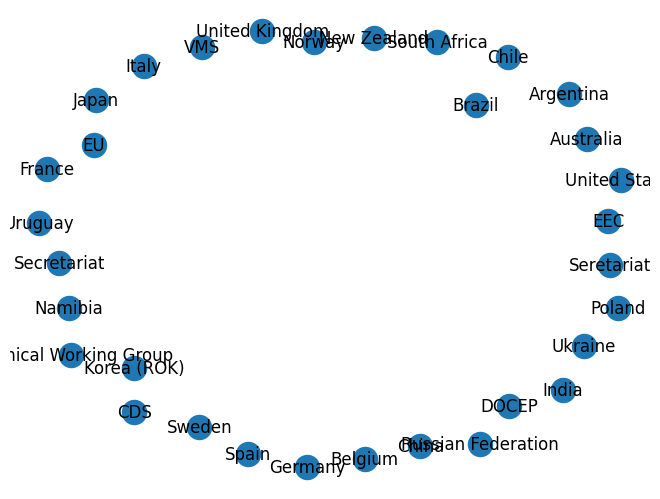

In [402]:
# Find all the nodes in the graph. 
def get_nodes(df):
    # Go through each cell of the dataframe and look for unique authors to set as nodes.
    author_columns = [f'Author {i}' for i in range(1, 11)]
    nodes=set()
    # For each cell in the section that we need to look through
    for col in author_columns:
        for row in df.index:
            author = df.at[row, col]
            # If the row is not blank
            if pd.notna(author):
                # Add the author in if we don't have it. 
                if author not in nodes:
                    nodes.add(author)
    nodes=list(nodes)
    return nodes
# Get the nodes using the function above.
nodes = get_nodes(df)
print("NODES: " , nodes)
print(len(nodes))

# Initialize the network in networkx
CCAMLR_network = nx.Graph()

# Add nodes to the graph
CCAMLR_network.add_nodes_from(nodes)

# Draw the network
nx.draw(CCAMLR_network, with_labels=True)
plt.show()


# Initialise the Network- Step 2
Create the graph with an edge between nodes $a$ and $b$ if they share at least one working paper. <br>
The weight of this edge is given by the number of working papers that $a$ and $b$ have collaborated on in the dataset. <br>

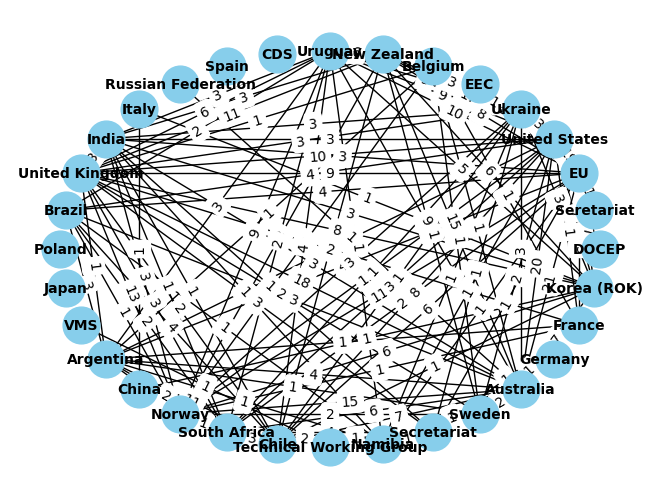

In [403]:
# Adds edges based on occurrences in the same row. 
def add_edges(df,CCAMLR_network):
    nodes=list(CCAMLR_network.nodes)
    # Each working paper with all the authors in that paper. 
    author_columns = [f'Author {i}' for i in range(1, 11)]
    all_rows = df[author_columns].values.tolist()
    # For each pair of nodes
    for n1 in nodes:
        for n2 in nodes:
            #Count the number of working papers that node n1 and node n2 share
            if n1!=n2:
                count=0
                for r in all_rows:
                    if n1 in r and n2 in r:
                        count+=1
                        continue
                # Count is the total weight of the edge. 
                if count >=1:
                    CCAMLR_network.add_edge(n1,n2,weight=count)
    return

add_edges(df,CCAMLR_network)

# Test the edge collection, to see if it is correct. 
#Checked and looks good!
# e.g correctly reports that Australia and Norway share 15 working papers together.
#print(CCAMLR_network["Australia"]["Norway"]["weight"])

# Visualize the network
pos = nx.circular_layout(CCAMLR_network)  # Positions for all nodes with specified spacing
nx.draw(CCAMLR_network, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(CCAMLR_network, 'weight')
nx.draw_networkx_edge_labels(CCAMLR_network, pos, edge_labels=edge_labels)

plt.show()

# Check Degree Distribution of the network
Graph the degree distribution in Matplotlib and see what it looks like. 

DEGREE SEQUENCE:  [0, 1, 17, 17, 13, 0, 7, 11, 14, 0, 0, 1, 2, 13, 16, 9, 0, 0, 1, 13, 2, 16, 13, 15, 1, 11, 9, 8, 19, 0, 9, 12]
Degree Distribution Power Law Fit Coefficients (a, b): [0.13370409 0.63898834]


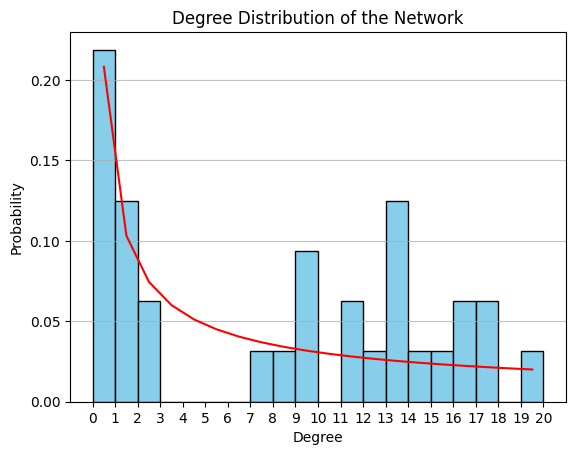

WEIGHT SEQUENCE:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 11, 11, 11, 11, 13, 15, 15, 17, 18, 19, 20, 21]
Weight Distribution Exponential Fit Coefficients (a, b): [0.5506014  0.41053121]


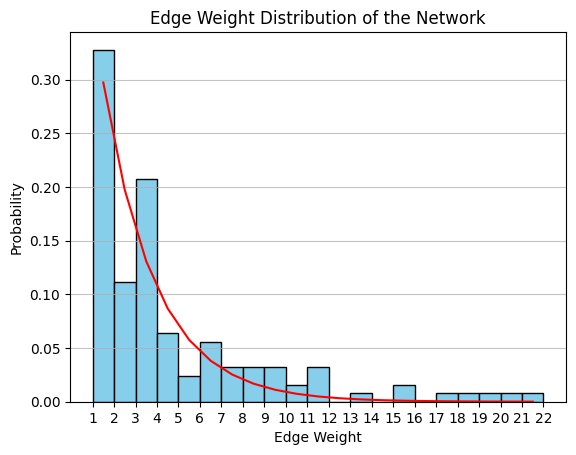

In [404]:
# Plot a histogram of the degree.
def plot_degree_distribution(CCAMLR_network):

    # Define power-law function
    def power_law(x, a, b):
        return a * x**(-b)
    # Plot the degree distribution as a probability distribution
    degrees = [CCAMLR_network.degree(node) for node in CCAMLR_network.nodes()]
    print("DEGREE SEQUENCE: ", degrees)
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), density=True, color='skyblue', edgecolor='black')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.title('Degree Distribution of the Network')
    plt.xticks(range(min(degrees), max(degrees) + 2))
    plt.grid(axis='y', alpha=0.75)

    # Regression model on the power law.
    bin_centers = np.array(range(min(degrees), max(degrees) + 1)) + 0.5
    hist, bin_edges = np.histogram(degrees, bins=range(min(degrees), max(degrees) + 2), density=True)
    popt, _ = curve_fit(power_law, bin_centers, hist)


    print("Degree Distribution Power Law Fit Coefficients (a, b):", popt)
    plt.plot(bin_centers, power_law(bin_centers, *popt), 'r-', label='Exponential Fit')

    plt.show()

plot_degree_distribution(CCAMLR_network)

# Plot a similar histogram for the edge weights:
def plot_weight_distribution(CCAMLR_network):
    # Calculate edge weight distribution

    def exponential(x, a, b):
        return a * np.exp(-b * x)

    edge_weights = [CCAMLR_network[edge[0]][edge[1]]['weight'] for edge in CCAMLR_network.edges()]
    edge_weights.sort()
    print("WEIGHT SEQUENCE: ", edge_weights)
    # Plot the edge weight distribution
    plt.hist(edge_weights, bins=range(min(edge_weights), max(edge_weights) + 2), density=True, color='skyblue', edgecolor='black')
    plt.xlabel('Edge Weight')
    plt.ylabel('Probability')
    plt.title('Edge Weight Distribution of the Network')
    plt.xticks(range(min(edge_weights), max(edge_weights) + 2))
    plt.grid(axis='y', alpha=0.75)

    bin_centers = np.array(range(min(edge_weights), max(edge_weights) + 1)) + 0.5
    hist, bin_edges = np.histogram(edge_weights, bins=range(min(edge_weights), max(edge_weights) + 2), density=True)
    popt, _ = curve_fit(exponential, bin_centers, hist)
    print("Weight Distribution Exponential Fit Coefficients (a, b):", popt)
    plt.plot(bin_centers, exponential(bin_centers, *popt), 'r-', label='Exponential Fit')

    

    plt.show()

plot_weight_distribution(CCAMLR_network)

# What type of network is this?
Now I'm really getting excited! There's some serious Power Law dynamics happening in this graph.
Let's test preferential attachment and small world on this model. <br>

Our fits are pretty good. What about clustering in the network? <br>

It looks like it's a small-world network, based on high clustering coefficient, power law distribution, and sigma and omega measures.


0.7549148099606815
0.53776888745929


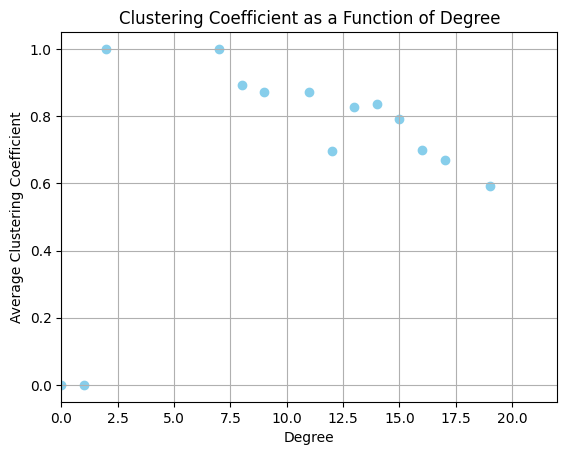

{'Seretariat', 'Ukraine', 'EU', 'United States', 'Belgium', 'New Zealand', 'Uruguay', 'Russian Federation', 'Italy', 'India', 'United Kingdom', 'Brazil', 'Argentina', 'China', 'Norway', 'South Africa', 'Chile', 'Namibia', 'Secretariat', 'Sweden', 'Australia', 'France', 'Korea (ROK)'}
1.6007905138339922
1.06713885199941
-0.028641975308642098


In [405]:
# Clustering coefficient.
# Global clustering
print(nx.transitivity(CCAMLR_network))
# Average node clustering
print(nx.average_clustering(CCAMLR_network))

# Graph node clustering as a function of degree
def plot_clustering_vs_degree(G):
    degrees = dict(G.degree())
    clustering_coeffs = nx.clustering(G)

    degree_clustering = {}
    for node, degree in degrees.items():
        if degree not in degree_clustering:
            degree_clustering[degree] = []
        degree_clustering[degree].append(clustering_coeffs[node])

    avg_clustering = {degree: np.mean(clustering_coeffs) for degree, clustering_coeffs in degree_clustering.items()}
    
    degrees = list(avg_clustering.keys())
    clustering_values = list(avg_clustering.values())

    plt.scatter(degrees, clustering_values, color='skyblue')
    plt.xlabel('Degree')
    plt.ylabel('Average Clustering Coefficient')
    plt.xlim((0,22))
    plt.title('Clustering Coefficient as a Function of Degree')
    plt.grid(True)
    plt.show()

plot_clustering_vs_degree(CCAMLR_network)

# If we remove the disconnected bits and take the largest connected component, then we can run the small world measures.
largest_cc = max(nx.connected_components(CCAMLR_network), key=len)
print(largest_cc)
sub = CCAMLR_network.subgraph(largest_cc).copy()

print(nx.average_shortest_path_length(sub))

print(nx.sigma(sub))
print(nx.omega(sub))


# Track the Network over time:

